# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# Load the dataset from the local data folder
# The dataset is located in the data/ folder of this project directory

In [3]:
# Read the data from the local data folder
df = pd.read_csv('data/foodhub_order.csv')

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {df.columns.tolist()}")

# Returns the first 5 rows
df.head()

Dataset shape: (1898, 9)

Column names: ['order_id', 'customer_id', 'restaurant_name', 'cuisine_type', 'cost_of_the_order', 'day_of_the_week', 'rating', 'food_preparation_time', 'delivery_time']


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [4]:
numberOfRows= len(df)
numberOfColumns= len(df.columns)
print(f"The total number of rows is {numberOfRows}", f"The total number of columns is {numberOfColumns}", sep='\n' )


The total number of rows is 1898
The total number of columns is 9


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [6]:
# No missing values indicated here, else we would use the df.dropna() or use the .isna().sum() option to find the total count of null values.
# df.isna().sum()

#### Observations:
 There are no missing values indicated else in the cleaning process we would get to fill or drop the null values. Since the non-null count for each column (attribute) is the total number of rows with non-null labels, we don't clean the data for null values specifically.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [7]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
Observations: (note the transposed table has numerical fields only).
Mean Prep Time: 2.737197e+01 mins
Minimum Prep Time: 20.00 mins
Max Prep Time: 35.00 mins

### **Question 5:** How many orders are not rated?

In [8]:
print(f"The number of orders that aren't rated are {(df['rating']=='Not given').sum()}")


The number of orders that aren't rated are 736


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

We are creating histogram boxplots for the continuous numerical variables such as cost_of_the_order, food_preparation_time, and delivery_time. This helps us understand the spread, and gives us the data's mean, median, variability, and any outliers. The fields order_id and customer_id hold no statistical significance.

In [9]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def histogram_boxplot(feature, figsize=(15, 10), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='red')

    # For histogram
    sns.histplot(x=feature, kde=False, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

    plt.show()

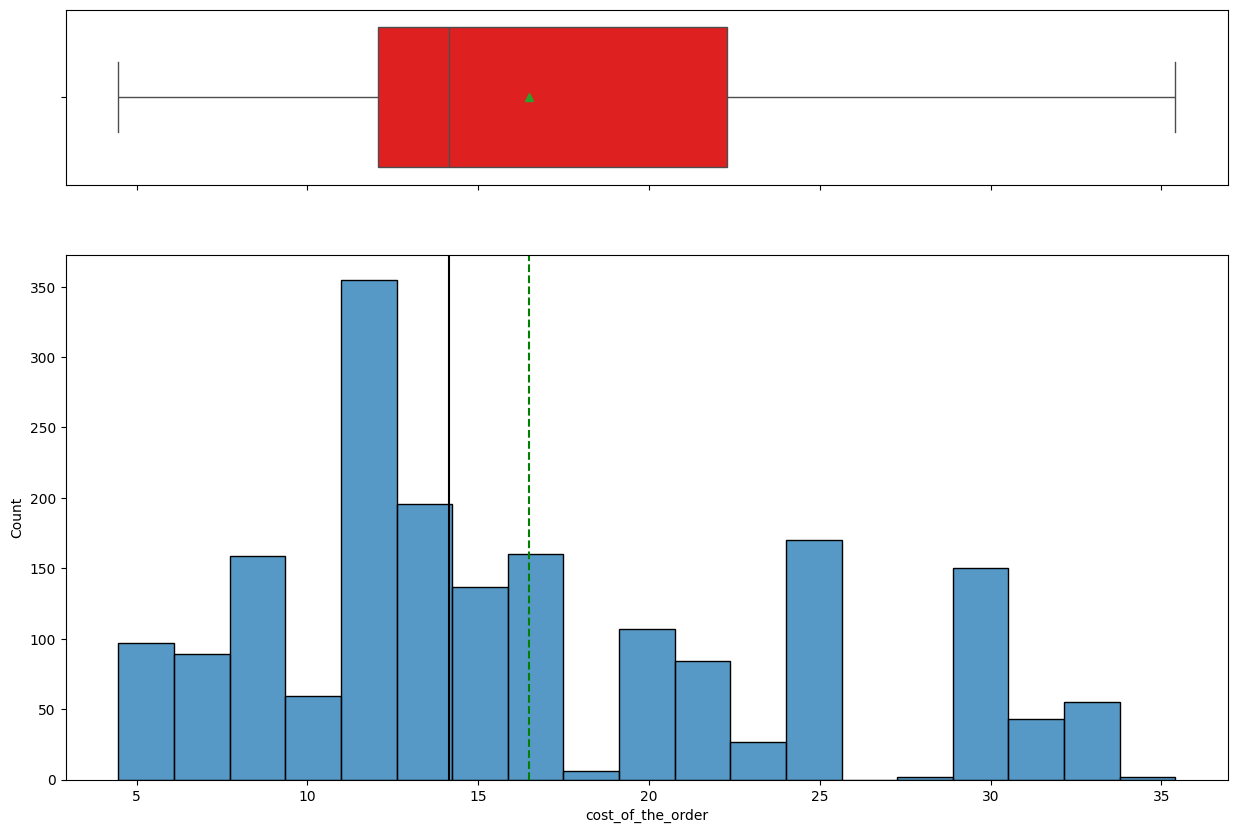

In [10]:
histogram_boxplot(df.cost_of_the_order)


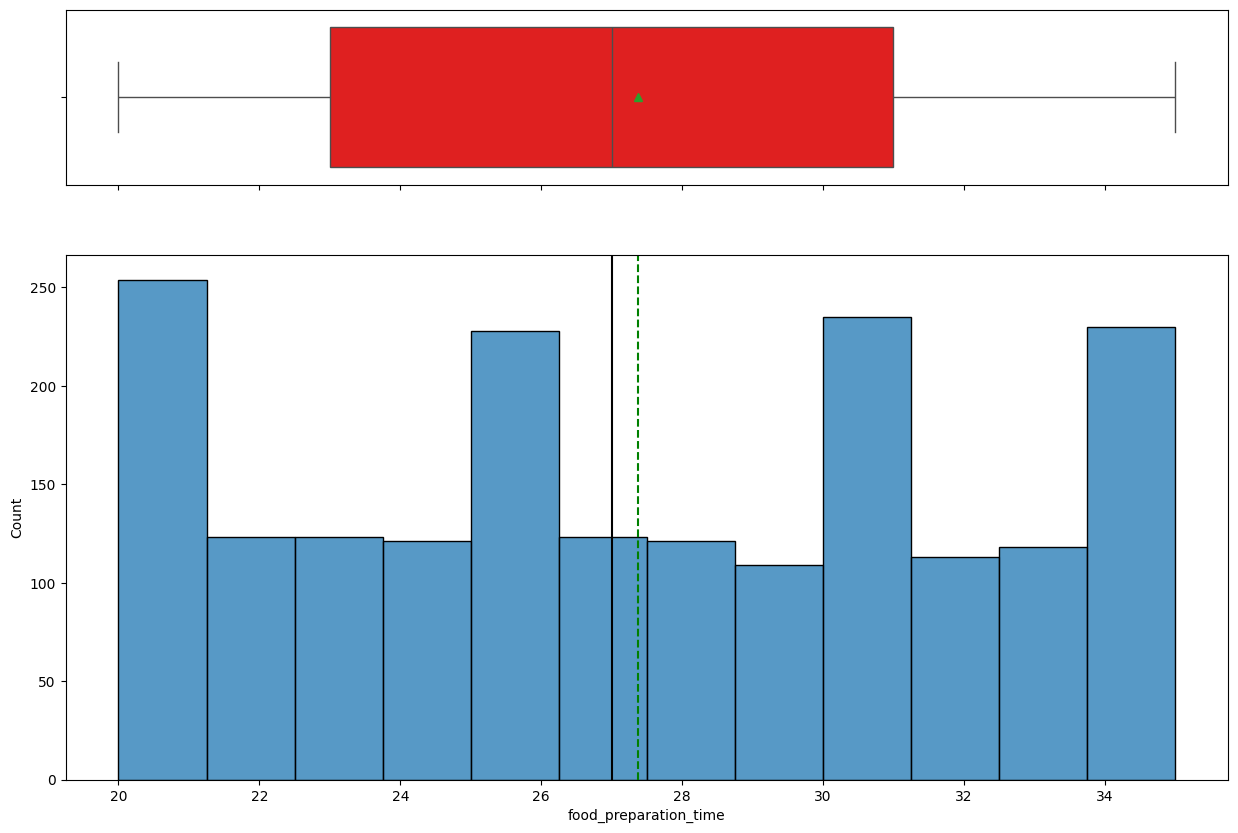

In [11]:
histogram_boxplot(df.food_preparation_time)


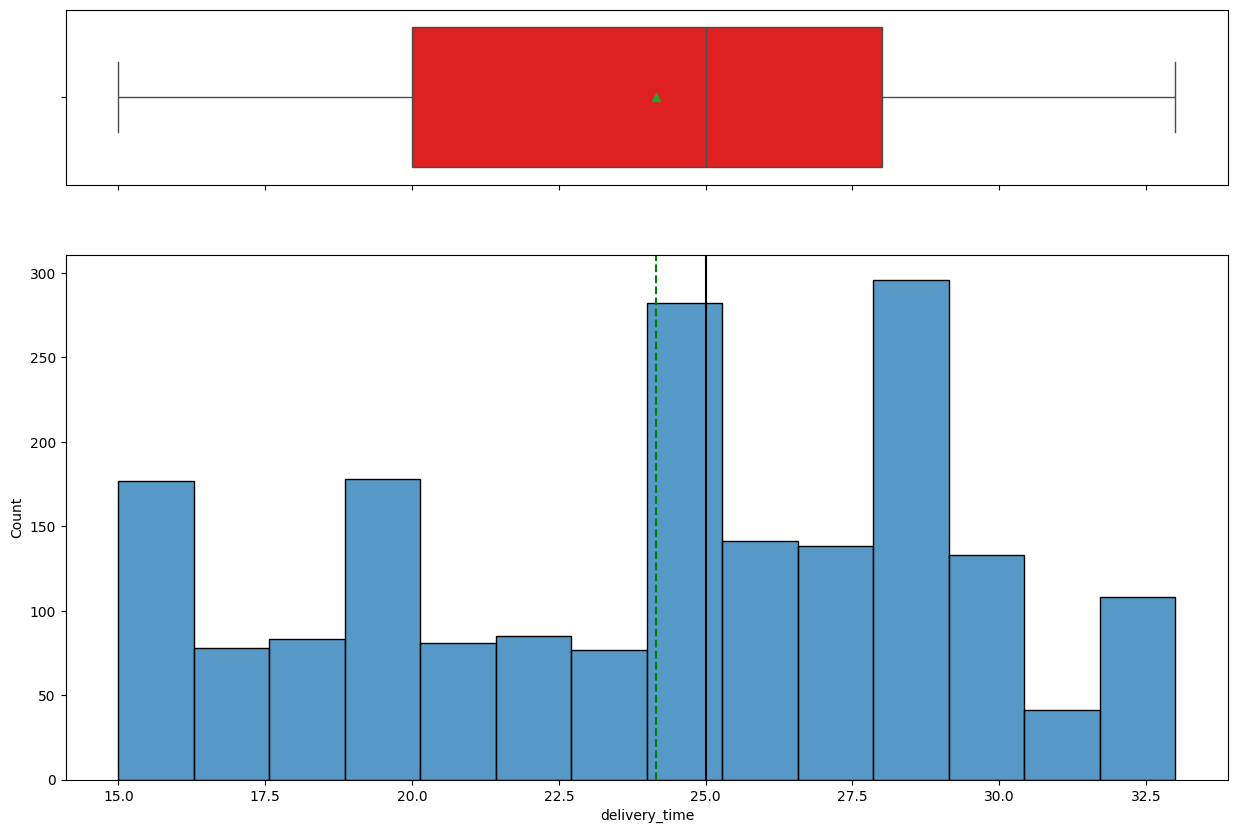

In [12]:
histogram_boxplot(df.delivery_time)


In [13]:
num_unique_restaurants = df['restaurant_name'].nunique()
print(f"The number of unique restaurants are {num_unique_restaurants}")


The number of unique restaurants are 178


c:\Users\thene\Cursor Apps\MIT-IDSS-DataScience-Projects\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\thene\Cursor Apps\MIT-IDSS-DataScience-Projects\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


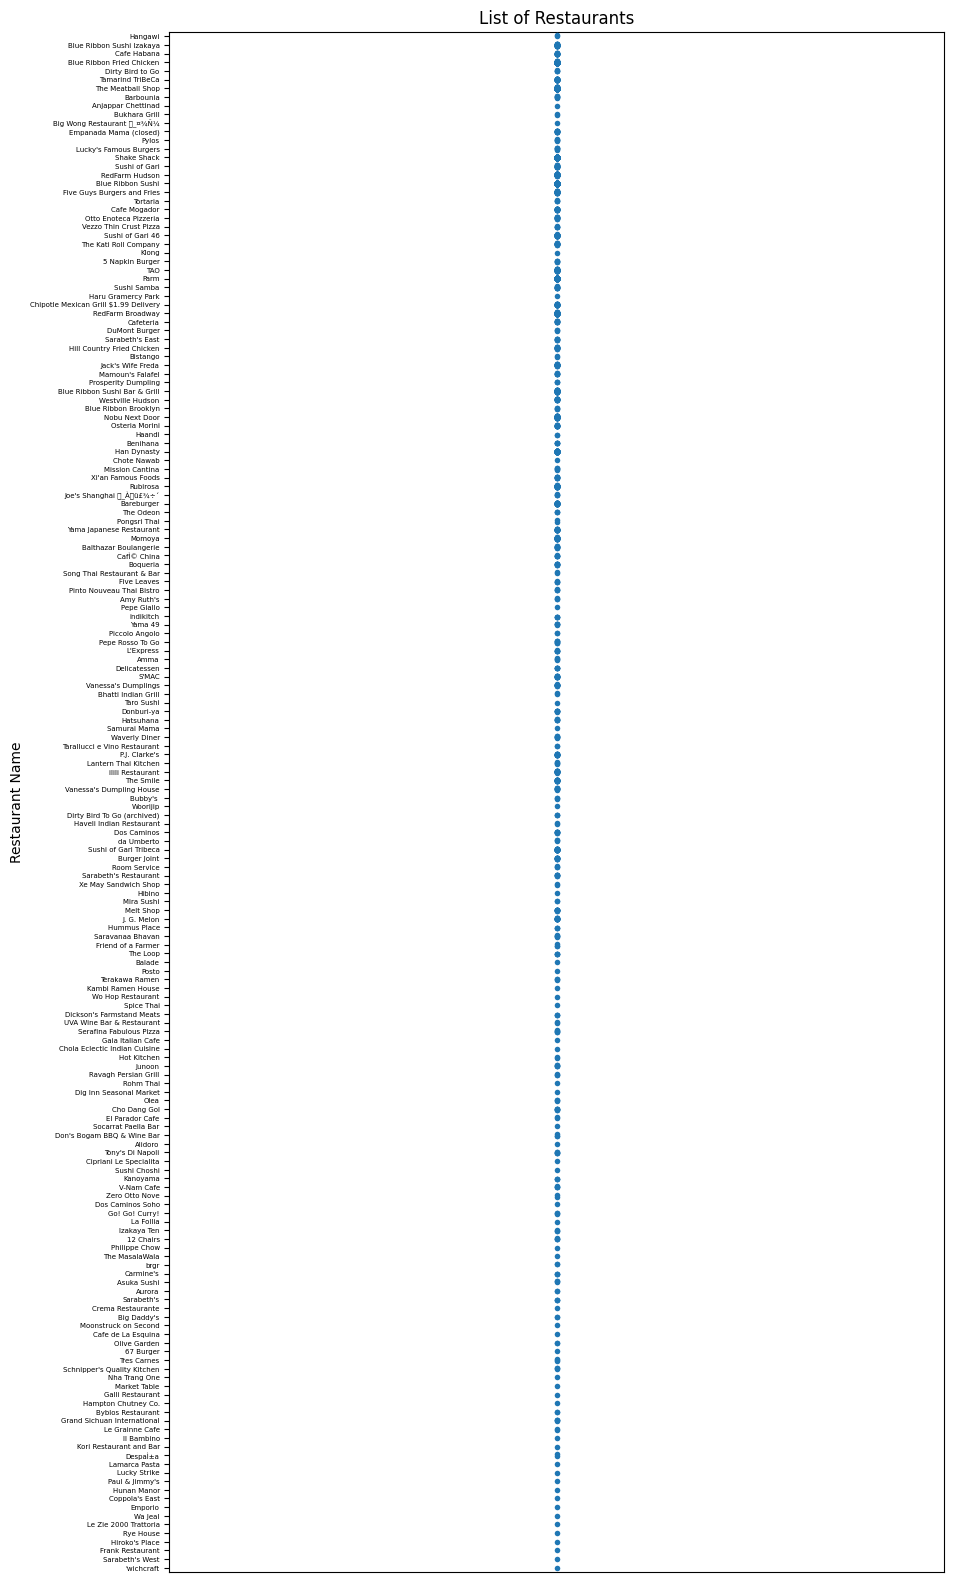

In [14]:
# Stripplot: Create a variable for the x-axis for plotting
df['dummyVar'] = np.ones(len(df)) #populate the variable with an array of 1s to show existence and maintain constance

# Plotting
plt.figure(figsize=(10, 20))
ax = sns.stripplot(y='restaurant_name', x='dummyVar', data=df, size=4)
plt.xlabel('')
plt.ylabel('Restaurant Name')
plt.yticks(fontsize=5)  # Adjust font size to fit 178 names
plt.title('List of Restaurants')
ax.get_xaxis().set_visible(False)  # Hide the x-axis as it's not meaningful here
plt.show()

C:\Users\thene\AppData\Local\Temp\ipykernel_4708\44697801.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='restaurant_name', data=df, order=df['restaurant_name'].value_counts().index, palette='viridis')
c:\Users\thene\Cursor Apps\MIT-IDSS-DataScience-Projects\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\thene\Cursor Apps\MIT-IDSS-DataScience-Projects\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


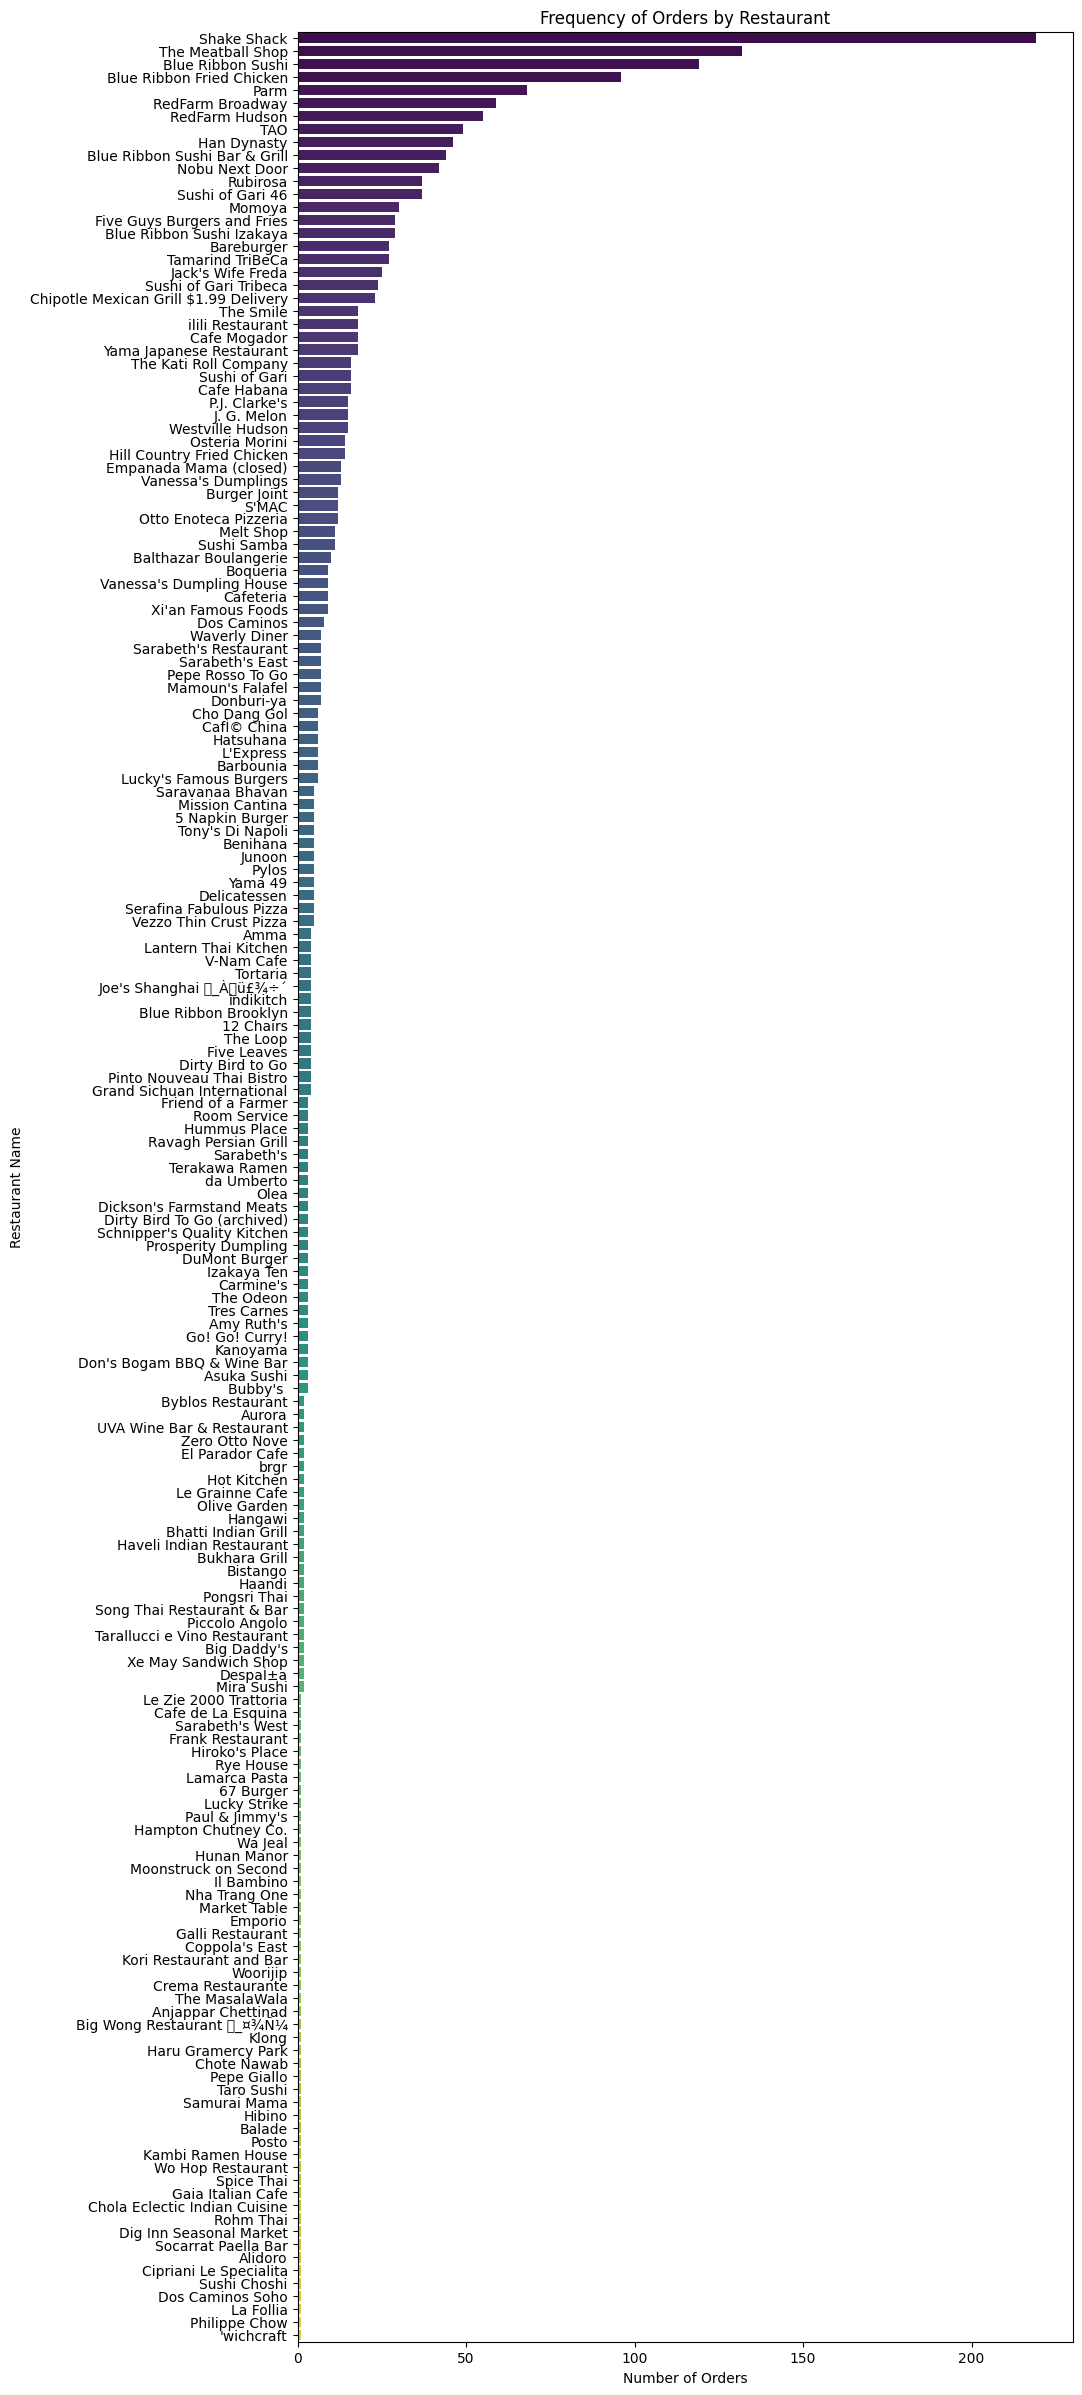

In [15]:
# We can use a countplot for the Categorical Variables which naturally displays the frequency.
# Given there are 178 unique restaurants, we are plotting the frequencies for all, understanding it might be crowded.

plt.figure(figsize=(10, 30))
ax = sns.countplot(y='restaurant_name', data=df, order=df['restaurant_name'].value_counts().index, palette='viridis')
plt.title('Frequency of Orders by Restaurant')
plt.xlabel('Number of Orders')
plt.ylabel('Restaurant Name')
plt.show()

We could alternatively use the palette= 'Set2' for lighter colour distinction where order doesn't really matter although viridis gives a more meaningful midpoint.



C:\Users\thene\AppData\Local\Temp\ipykernel_4708\1434351464.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day_of_the_week', data=df, palette='coolwarm')
C:\Users\thene\AppData\Local\Temp\ipykernel_4708\1434351464.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='cuisine_type', data=df, order=df['cuisine_type'].value_counts().index, palette='coolwarm')
C:\Users\thene\AppData\Local\Temp\ipykernel_4708\1434351464.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df_filtered_ratings, palette='coolwarm', o

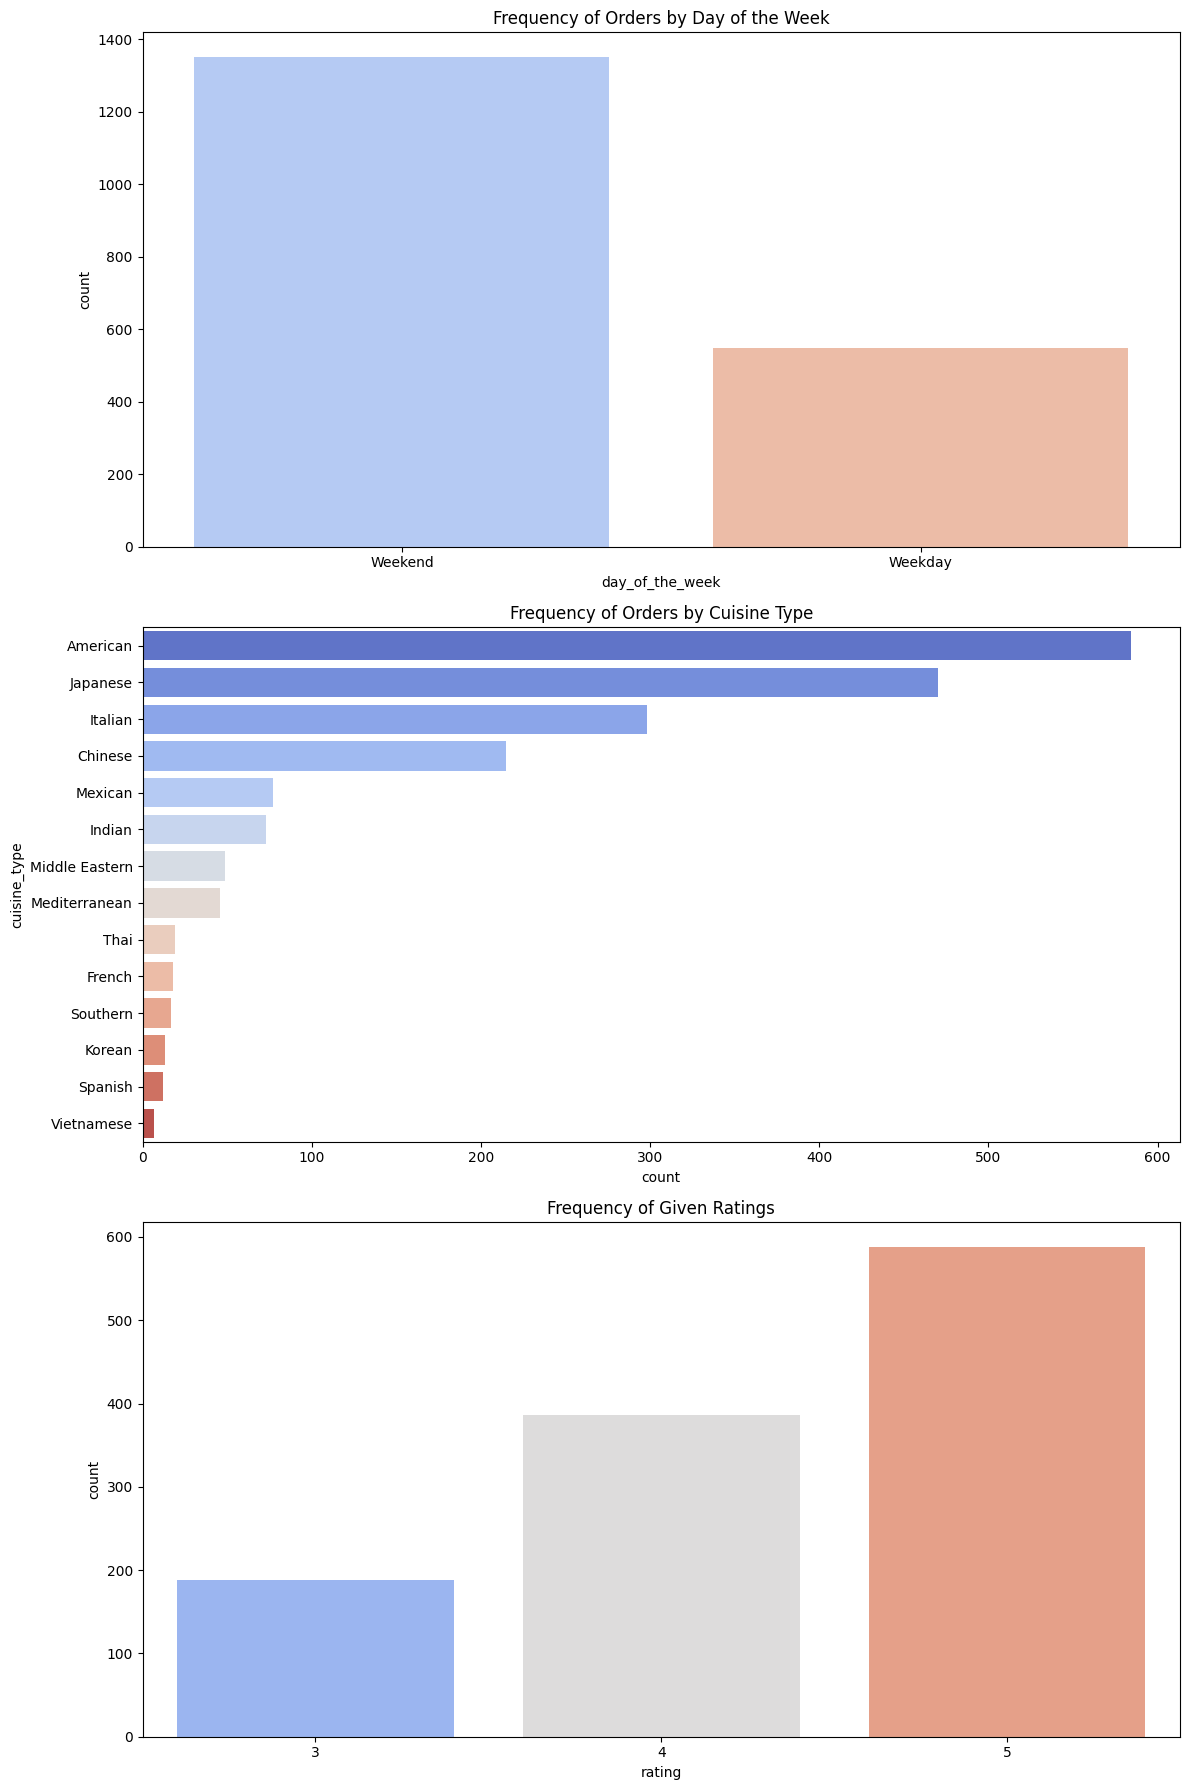

In [16]:
# Set figure size for clearer visualization of each plot
plt.figure(figsize=(12, 18))

# Plot for 'day_of_the_week'
plt.subplot(3, 1, 1) #3 rows, 1 column, current subpot position
sns.countplot(x='day_of_the_week', data=df, palette='coolwarm')
plt.title('Frequency of Orders by Day of the Week')

# Plot for 'cuisine_type'
plt.subplot(3, 1, 2)#3 rows, 1 column, current subpot position
sns.countplot(y='cuisine_type', data=df, order=df['cuisine_type'].value_counts().index, palette='coolwarm')
plt.title('Frequency of Orders by Cuisine Type')

#Plot for 'rating' filter for 'Not given'
df_filtered_ratings = df[df['rating'] != 'Not given']
num_unique_ratings = df_filtered_ratings['rating'].nunique()#used after the plot to show the unique ratings
plt.subplot(3, 1, 3)
sns.countplot(x='rating', data=df_filtered_ratings, palette='coolwarm', order=df_filtered_ratings['rating'].dropna().sort_values().unique())
plt.title('Frequency of Given Ratings')

plt.tight_layout()
plt.show()

Observations: Number of Orders are more in amount on the Weekends. Amongst all the cuisines American seems to be the most popular, and the rating 5 is of the highest frequency with 3 as the lowest. There are only ratings of values 3, 4, 5 in the dataset. Least popular cuisine based on this sample of restaurants is Vietnamese.



In [17]:
print(f"The number of distinct ratings are {num_unique_ratings}")


The number of distinct ratings are 3


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [18]:
top_5_restaurants = df['restaurant_name'].value_counts().head(5)
top_5_restaurants

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:
 Out of all the top 5 restaurants - Shake Shack is the most popular and Parm is the 5th.



### **Question 8**: Which is the most popular cuisine on weekends?

In [19]:
# Filtering the data for orders placed on weekends
orders_in_the_weekend = df[df['day_of_the_week'] == 'Weekend']
# Calculating the most popular cuisine on weekends for the number of orders
most_popular_cuisine_the_weekend = orders_in_the_weekend['cuisine_type'].value_counts().head(1)
most_popular_cuisine_the_weekend

cuisine_type
American    415
Name: count, dtype: int64

#### Observations:
American cousine is the most popular with 415 orders

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [20]:
# Calculating the percentage of orders that cost more than 20 dollars
orders_above_20_dollars = df[df['cost_of_the_order'] > 20]
percentage_above_20_dollars = (len(orders_above_20_dollars) / len(df)) * 100
print(f" the percentage unrounded is {percentage_above_20_dollars}%")
percentage_above_20_rounded = round(percentage_above_20_dollars, 3)
print(f" the percentage rounded to 3 sf is  {percentage_above_20_rounded}%")

 the percentage unrounded is 29.24130663856691%
 the percentage rounded to 3 sf is  29.241%


#### Observations:
the percentage unrounded is 29.24130663856691%.The percentage rounded to 3 sf is 29.241%



### **Question 10**: What is the mean order delivery time?

In [21]:
avg_delivery_time = df['delivery_time'].mean()
avg_delivery_time

24.161749209694417

#### Observations:
The mean delivery time is 24.162 mins

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [22]:
# Calculating the top 3 most frequent customers based on the number of orders placed
top_3_customers = df['customer_id'].value_counts().head(3)
top_3_customers

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

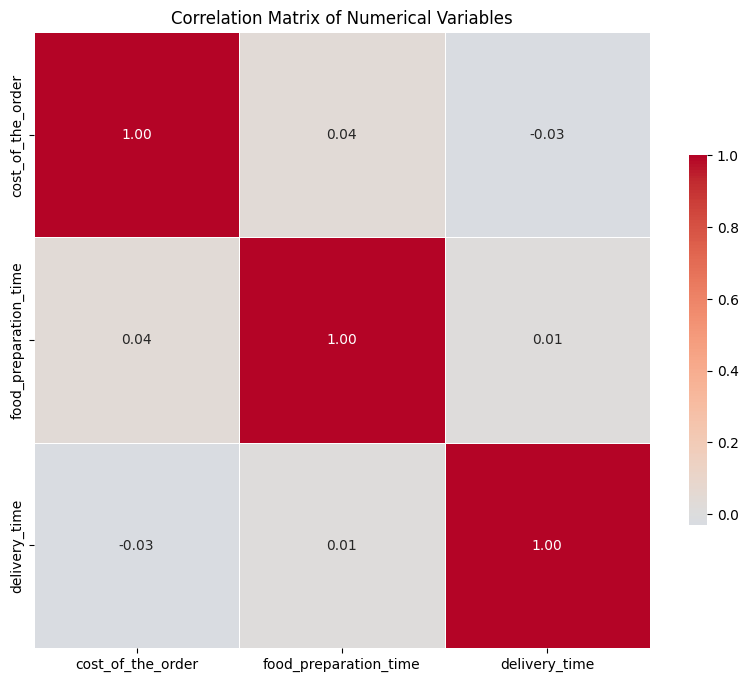

In [23]:
# Calculate the correlation matrix
corr_matrix = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr() #for all the statistically significant numerical variables in the dataset

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f",
            square=True, linewidths=.6, cbar_kws={"shrink": .6})
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

Observation: not a strong correlation amongst these factors except with themselves. No linear correlation with the factors either, except with themselves.



C:\Users\thene\AppData\Local\Temp\ipykernel_4708\652804762.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cost_of_the_order', y='cuisine_type', data=df, palette='Set3')


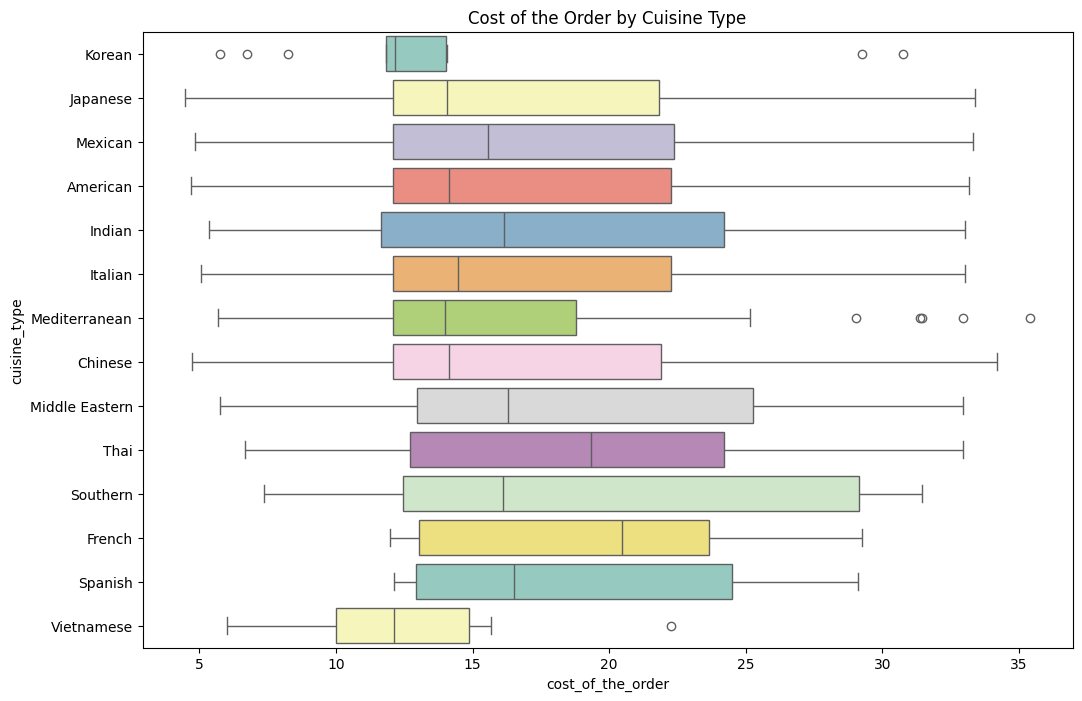

In [24]:
# Boxplot for cost_of_the_order by cuisine_type
plt.figure(figsize=(12, 8))
sns.boxplot(x='cost_of_the_order', y='cuisine_type', data=df, palette='Set3')
plt.title('Cost of the Order by Cuisine Type')
plt.show()

Greatest IQR is that of Southern cuisine. Lowest IQR is of the Korean Cuisine. 25% of Vietnamese cuisine is minimum of the entire dataset, for cost. Outliers are present from highest to lowest in amount for Korean, Mediterranean, and Vietnamese cuisine.
75% of the Southern Cuisine is the maximum.

Variety in pricing strategies among restaurants offering different types of food is high. For example, some cuisines might inherently have higher costs due to ingredients or preparation complexity. An example of this is the Chinese restaurant

Range of Prices: The interquartile range (IQR) gives insight into the consistency of pricing within that category. A wide IQR suggests a uniformity of prices within the cuisine, indicating a menu which caters to both economical and premium options.

Affordability: Cuisines with a lower median cost and fewer high-cost outliers might be seen as more affordable, alluring a different customer category altogether.

Outliers and Premium Options: Presence of outliers above the upper whisker for certain cuisines as mentioned in the first few pointers could indicate premium dishes or orders that are significantly more expensive than the average for that cuisine. This could indicate that some restaurants or cuisines offer specialty items that demand higher prices.

C:\Users\thene\AppData\Local\Temp\ipykernel_4708\695568836.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_of_the_week', y='delivery_time', data=df, palette='Set2')


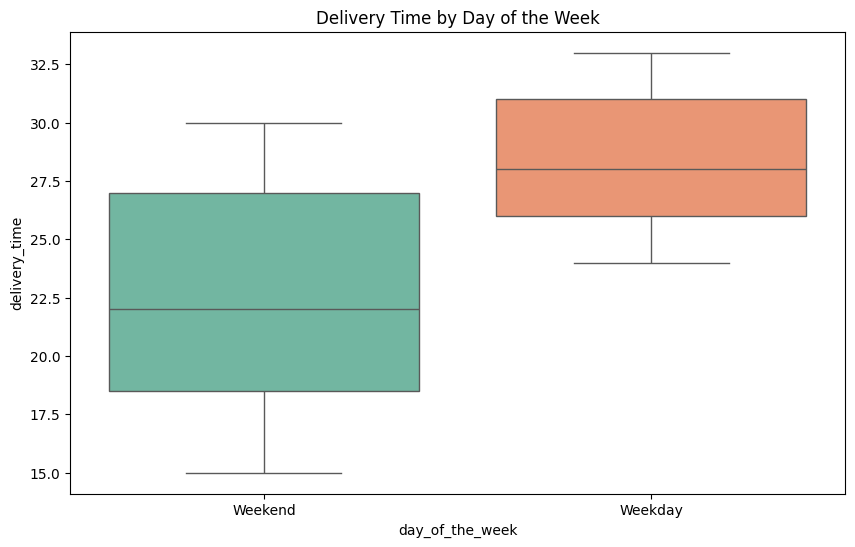

In [25]:
# Boxplot for delivery_time by day_of_the_week
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df, palette='Set2')
plt.title('Delivery Time by Day of the Week')
plt.show()

The Median for the Weekend is lower that the weekday suggesting that there is more traffic or travelling obstacles for the weekday. IQR of the weekend is greater than that of the weekday suggesting greater demand in the weekend matched with a greater spread of time influencing the customer satisfaction

Outliers on the greater end, represent deliveries that took longer than most. This could incurr because of order volumem, distance of locations or other operational/ logistical inefficiencies that need to be sorted.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [26]:
# Clean the ratings column and convert ratings to numeric
df['rating_clean'] = pd.to_numeric(df['rating'], errors='coerce') ##converts incompatible values to NaN (Not a Number). This is useful to ensure the conversion process executes regardless of any input discrepencies
# we already know that the data is void of null_values
# Group the data by 'restaurant_name', calculate the mean rating and count for each restaurant
grouped_restaurants = df.groupby('restaurant_name').agg(
    average_rating=('rating_clean', 'mean'),
    rating_count=('rating_clean', 'count')
)

# Filter the grouped data to find restaurants with more than 50 ratings and an average rating greater than 4
eligible_restaurants = grouped_restaurants[(grouped_restaurants['rating_count'] > 50) &
                                           (grouped_restaurants['average_rating'] > 4)]
eligible_restaurants

,average_rating,rating_count
restaurant_name,,
Blue Ribbon Fried Chicken,4.328125,64
Blue Ribbon Sushi,4.219178,73
Shake Shack,4.278195,133
The Meatball Shop,4.511905,84


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [27]:
# Revenue generated by the company for each order
def calculate_revenue(row_entry):
    if row_entry['cost_of_the_order'] > 20:
        return row_entry['cost_of_the_order'] * 0.25 ## Apply the charges
    elif row_entry['cost_of_the_order'] > 5:
        return row_entry['cost_of_the_order'] * 0.15
    else:
        return 0

# Apply the function to each row of the DataFrame
df['revenue'] = df.apply(calculate_revenue, axis=1)# function is applied to each row

# Total net revenue generated by the company across all orders
net_revenue = df['revenue'].sum()
print(f" The net revenue is {net_revenue} usd")

 The net revenue is 6166.303 usd


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [28]:
# Calculate the total time required for delivery (food preparation time + delivery time)
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate the percentage of orders that take > than 60 minutes
orders_over_60_minutes = (df['total_delivery_time'] > 60).sum() #find entries satisfying the criteria
total_orders = len(df)
percentage_over_60_minutes = (orders_over_60_minutes / total_orders) * 100

print(f"The resulting percentage is {round(percentage_over_60_minutes, 3)}%")

The resulting percentage is 10.537%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [29]:
# Calculate the mean delivery time for weekdays and weekends
mean_delivery_time_for_weekdays = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
mean_delivery_time_for_weekends = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
mean_delivery_time_for_weekdays, mean_delivery_time_for_weekends

(28.340036563071298, 22.4700222057735)

#### Observations:
The mean delivery_time on weekdays is greater than the mean delivery_time on weekends

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  The company charges 25% on orders costing more than 20 USD and 15% on orders cost more that 5 USD.This implies a tiered pricing model where the commission rate changes based on the order value,the structure is effective, particularly for orders over $20. This approach capitalizes on higher-priced orders efficiently, contributing significantly to net revenue.

* Cuisine types with higher average ratings and numerous reviews (e.g., restaurants qualifying for the promotional offer with ratings above 4 and more than 50 reviews) indicate strong customer preference and satisfaction.

* Variability in delivery times, with weekdays averaging 28.34 minutes and weekends 22.47 minutes, suggests possibilities for optimization, maybe due to factors like traffic or order volume.

* With around 10.54% of orders exceeding 60 minutes for delivery, for those expecting faster service, there's a potential impact on customer satisfaction. Hence there exists room for improving the margin of satisfaction.

### Recommendations:

* Popular Cuisines - Incentivize the addition of restaurants offering highly rated cuisines (e.g., those identified in the promotional offer: Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop) to cater to customer preferences and attract a wider customer base.

* Investigate and address the causes of extended delivery times during weekdays. Include optimizing delivery routes or adjusting staffing based on demand, check the net benefit of adjusting or hiring more delivery staff vs saving on delivery time

* Use feedback and customer ratings to guide improvements in service and offerings. Highlight restaurants with high ratings to inform customer choices and enhance satisfaction.

* Implement measures to reduce delivery times for orders exceeding 60 minutes, such as providing real-time order status updates to customers.

* Continuously analyze customer preferences, behavior, and operational and logistical metrics to drive business decisions, aiming for improved efficiency and customer engagement.

* Use Data for Promotions: Design promotional and loyalty programs around popular and highly rated cuisines and restaurants, encouraging ROIS and customers return and satisfaction.

---